# COURSE: A deep understanding of deep learning
## SECTION: Regularization
### LECTURE: The importance of equal batch sizes
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [30]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import numpy as np
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

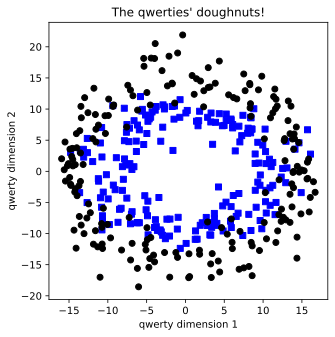

In [31]:
# create data

nPerClust = 200

th = np.linspace(0, 4 * np.pi, nPerClust)
r1 = 10
r2 = 15

# generate data
a = [r1 * np.cos(th) + np.random.randn(nPerClust) * 3,
     r1 * np.sin(th) + np.random.randn(nPerClust)]
b = [r2 * np.cos(th) + np.random.randn(nPerClust),
     r2 * np.sin(th) + np.random.randn(nPerClust) * 3]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# concatanate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Separate the data into DataLoaders

In [32]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# finally, translate into dataloader objects
train_batchsize = 16
test_batchsize = test_data.tensors[0].shape[0] - 2
train_loader = DataLoader(train_data, batch_size=train_batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_batchsize)

In [33]:
# check sizes of data batches
for X, y in train_loader:
    print(X.shape, y.shape)

torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])
torch.Size([16, 2]) torch.Size([16, 1])


In [34]:
# check sizes of data batches
for X, y in test_loader:
    print(X.shape, y.shape)

torch.Size([38, 2]) torch.Size([38, 1])
torch.Size([2, 2]) torch.Size([2, 1])


# Model stuff

In [35]:
class theModelClass(nn.Module):
    def __init__(self):
        super().__init__()

        ### layers
        self.input = nn.Linear(2, 128)
        self.hidden = nn.Linear(128, 128)
        self.output = nn.Linear(128, 1)


    # forward pass
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

In [36]:
# a function that creates the ANN model

def createANewModel():
    # grab an instance of the model class
    ANNQC = theModelClass()

    # loss function
    lossfun = nn.BCEWithLogitsLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNQC.parameters(), lr=.01)

    return ANNQC, lossfun, optimizer

In [37]:
# train the model

# global parameter
numepochs = 500


# NOTE: this time, the model, lossfun, and optimizer are inputs into the function!
def trainTheModel(ANNQC, lossfun, optimizer):
    # initialize accuracies as empties (not storing losses here)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):

        # loop over training data batches
        batchAcc = []
        for X, y in train_loader:
            # forward pass and loss
            yHat = ANNQC(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append(100 * torch.mean(((yHat > 0) == y).float()).item())
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append(np.mean(batchAcc))

        # test accuracy (NOTE: testing in batches!)
        tstacc = []
        for X, y in test_loader:
            yHat = ANNQC(X)
            tstacc.append(100 * torch.mean(((yHat > 0) == y).float()).item())
        # now get the average accuracy over test-batches
        testAcc.append(np.mean(tstacc))

    # function output
    return trainAcc, testAcc


# Application

In [38]:
# create a model
ANNQC, lossfun, optimizer = createANewModel()

# train the model (note the inputs!)
trainAcc, testAcc = trainTheModel(ANNQC, lossfun, optimizer)

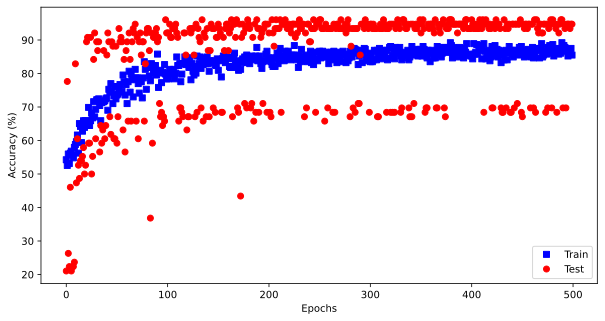

In [39]:
# plot the results
fig = plt.figure(figsize=(10, 5))

plt.plot(trainAcc, 'bs')
plt.plot(testAcc, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])

plt.show()